In [17]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as random_gauss
from scipy.stats import multivariate_normal
from scipy import random, linalg

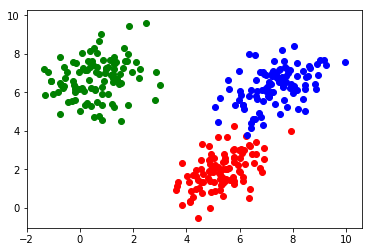

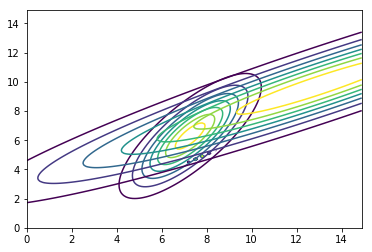

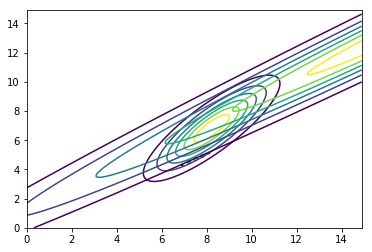

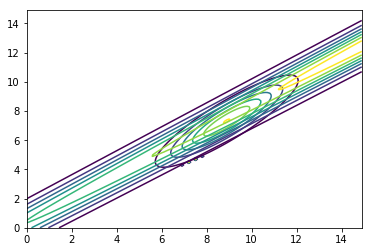

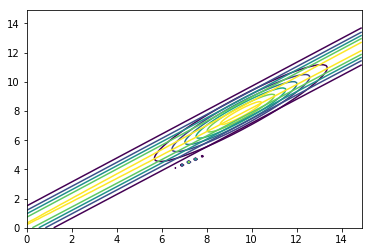

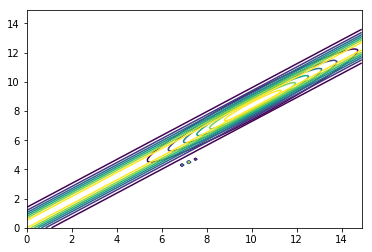

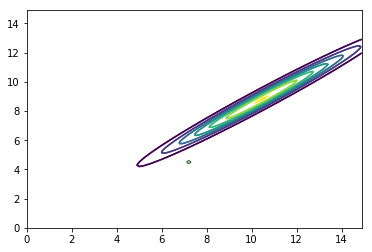

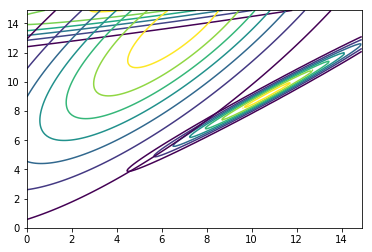

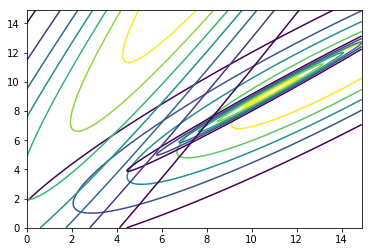

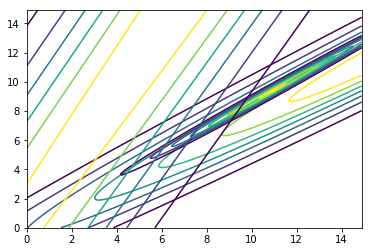

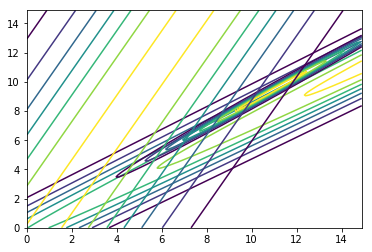

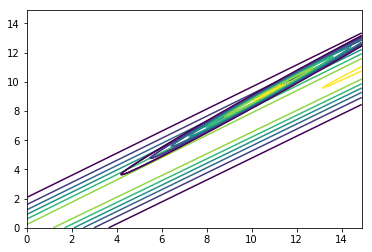

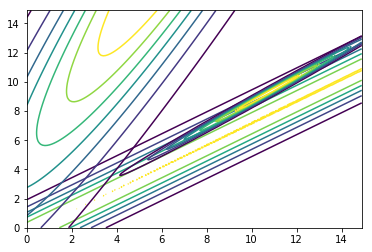

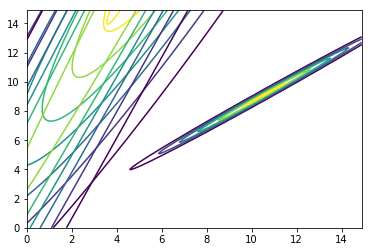

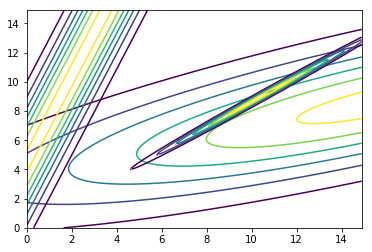

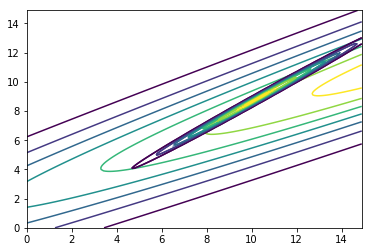

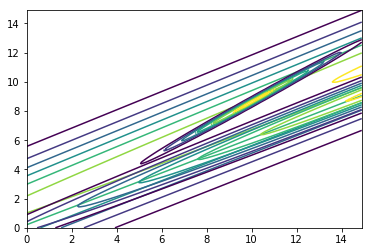

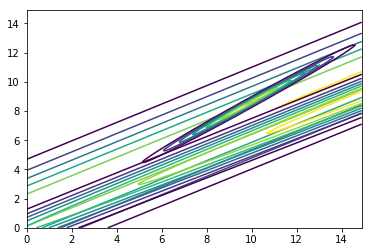

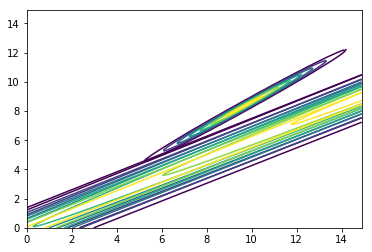

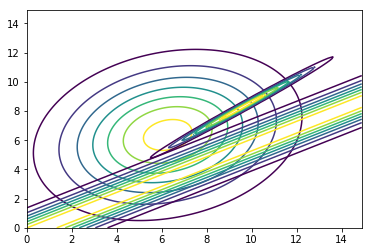

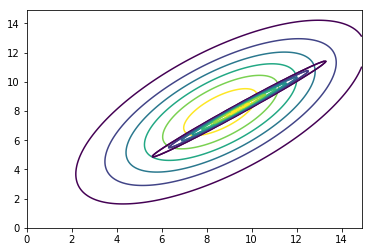

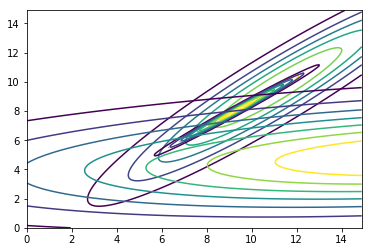

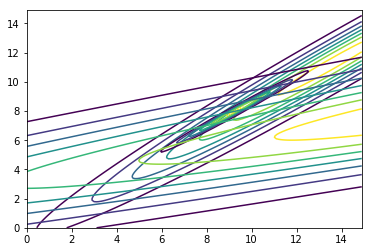

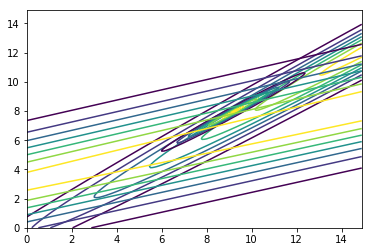

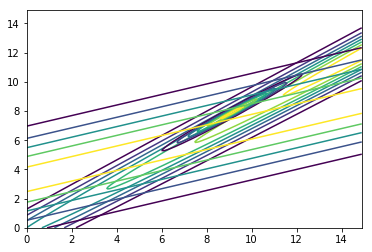

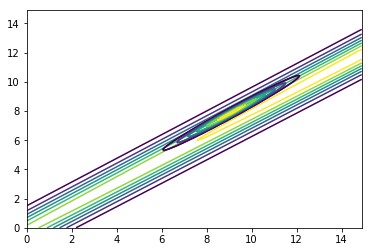

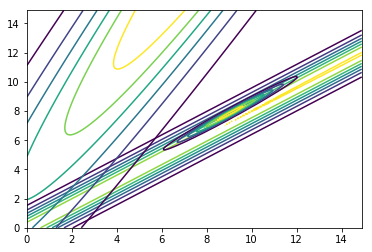

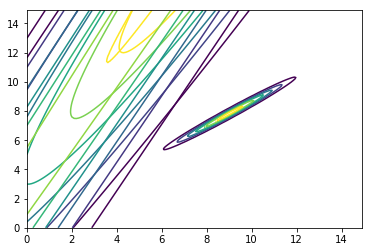

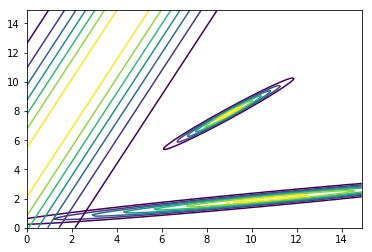

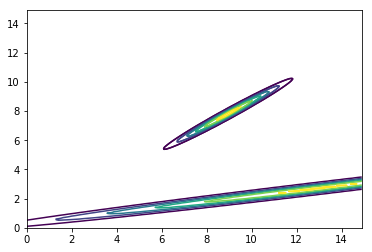

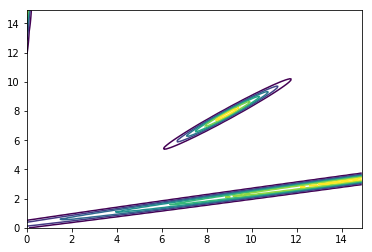

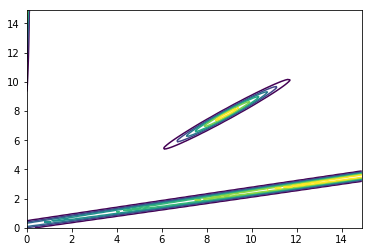

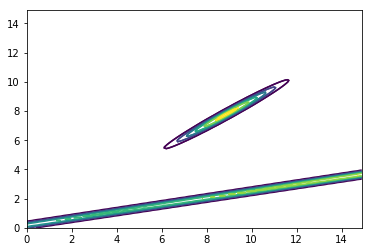

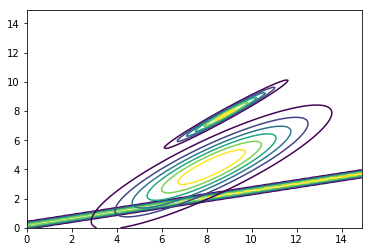

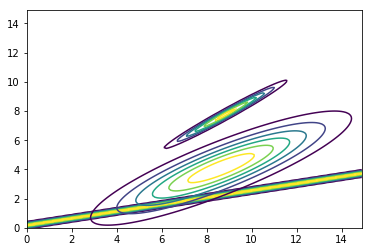

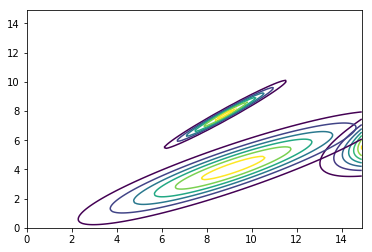

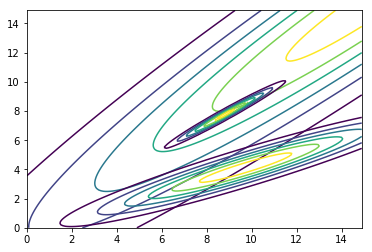

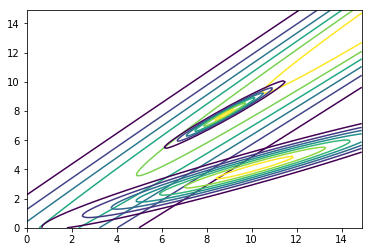

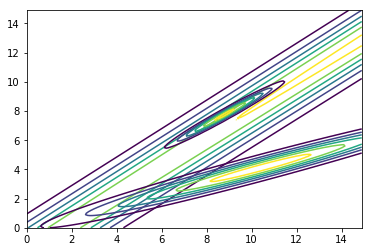

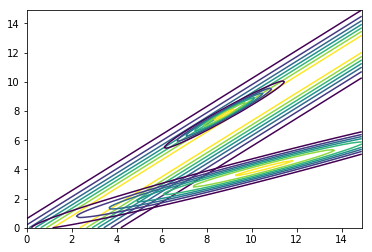

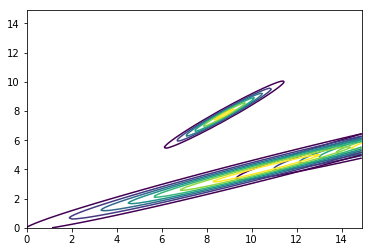

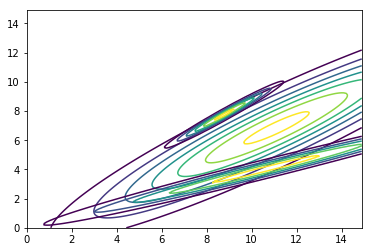

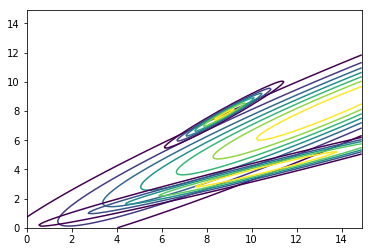

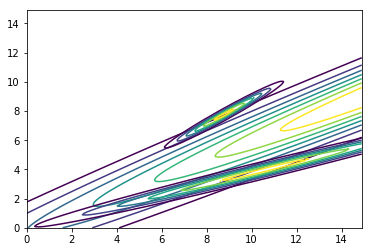

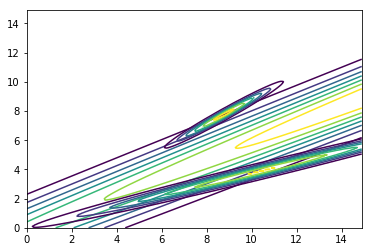

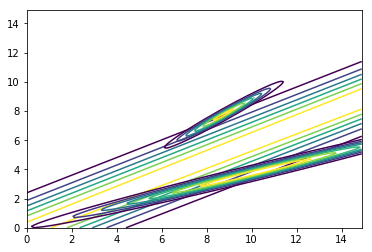

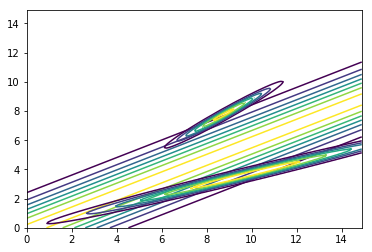

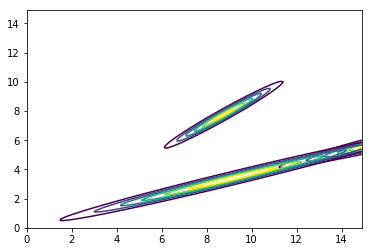

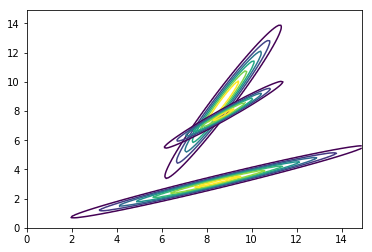

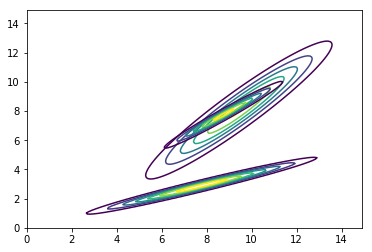

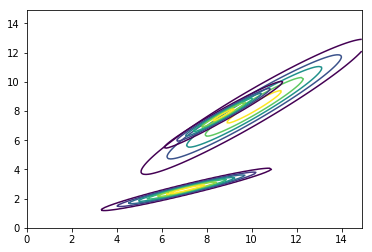

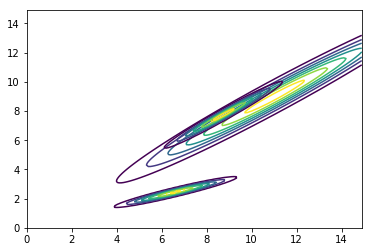

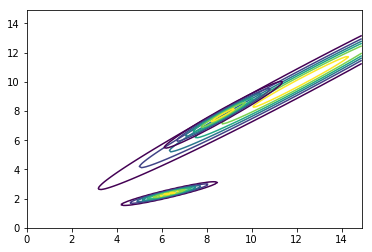

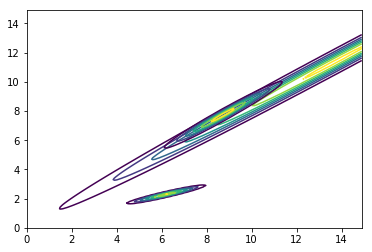

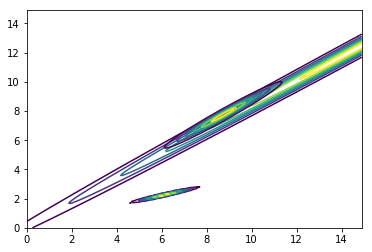

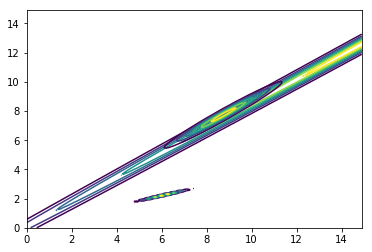

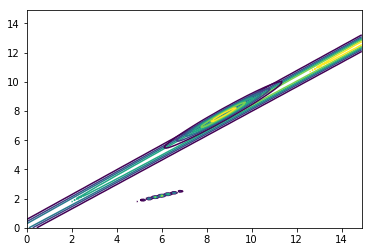

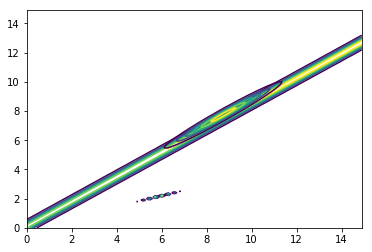

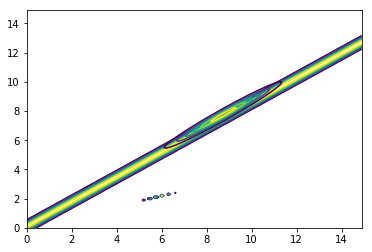

ValueError: zero-size array to reduction operation minimum which has no identity

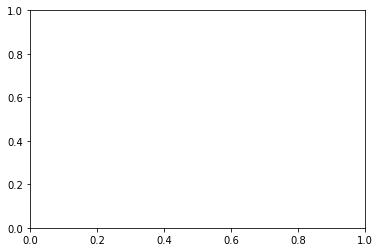

In [27]:
x = []
y = []
distributions = []
colors = ["red", "blue", "green"]
covs = [
    [[1, 0.5], [0.5,  1]],
    [[1, 0.3], [0.3,  1]],
    [[1, 0], [0,  1]]
]
for (x, y), cov in zip([random.rand(2,) * 10 for _ in range(3)], covs):
    distributions.append(random_gauss((x, y), cov, 100))

for d, c in zip(distributions, colors):
    plt.scatter(d[:,0], d[:,1], color=c)
plt.show()
    
phi = [1/3] * 3
mu = [(0, 0), (0.7, 1), (1, 0.5)] #TODO: actual random data

def generate_covariance():
    random_matrix = random.rand(2, 2) * 10
    return np.dot(random_matrix, random_matrix.transpose())
    
sigma = []
for _ in range(len(phi)):
    sigma.append(generate_covariance())

samples = np.concatenate(distributions)

weights = np.zeros((len(phi), len(samples)))
for _ in range(100):
    # e-step
    for j in range(len(phi)):
        rv = multivariate_normal(mu[j], sigma[j])
        for i in range(len(samples)):
            weights[j][i] = rv.pdf(samples[i])
    # m-step
    for j in range(len(phi)):
        phi[j] = np.average(weights[j])
        for w, sample in zip(weights[j], samples):
            mu[j] += w * sample
        mu[j] = mu[j]/sum(weights[j])
        s = np.zeros((2, 2))
        for i in range(len(samples)):
            x = samples[i]
            s += weights[j][i] * (np.mat(x - mu[j]).T * np.mat(x - mu[j]))
        s = s / sum(weights[j])
        sigma[j] = s

    for j in range(len(phi)):
        x, y = np.mgrid[0:15:0.1, 0:15:0.1]
        pos = np.dstack((x, y))
        try:
            rv = multivariate_normal(mu[j], sigma[j])
        except np.linalg.LinAlgError as e:
            print()
            mu[j] = random.rand(2,) * 10
            sigma[j] = generate_covariance()
            
            
        plt.contour(x, y, rv.pdf(pos))
    plt.show()
    